<a href="https://colab.research.google.com/github/Priyo-prog/Deep-Learning-with-Tensorflow/blob/main/Neural%20Network%20Regression%20with%20Tensorflow/Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Regression with Neural Network using Tensorflow**

In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome' or 'response' variable) and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features'). The most common form of regression analysis is linear regression, in which one finds the line (or a more complex linear combination) that most closely fits the data according to a specific mathematical criterion. For example, the method of ordinary least squares computes the unique line (or hyperplane) that minimizes the sum of squared differences between the true data and that line (or hyperplane). For specific mathematical reasons (see linear regression), this allows the researcher to estimate the conditional expectation (or population average value) of the dependent variable when the independent variables take on a given set of values. Less common forms of regression use slightly different procedures to estimate alternative location parameters (e.g., quantile regression or Necessary Condition Analysis[1]) or estimate the conditional expectation across a broader collection of non-linear models (e.g., nonparametric regression).

In [ ]:
import tensorflow as tf
tf.__version__

'2.6.0'

# Creating Data to view and fit

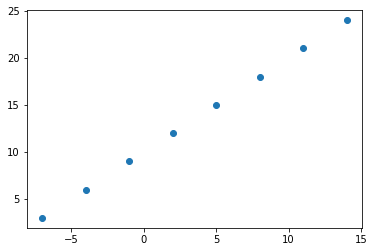

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features

X = np.array([-7.,-4.,-1.,2.,5.,8.,11.,14.])

# Create Labels
y = np.array([3.,6.,9.,12.,15.,18.,21.,24.])

# Visualize it
plt.scatter(X,y)

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output Shapes

In [ ]:
# Creating a demo tensor for our price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
# We want to predict one output of 'y' for one input of 'X'
X[0], y[0]

(-7.0, 3.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape   # These will show no shape because they are individual scalar without dimension 

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
# Turn Numpy arrays to tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

# Steps in modelling the tensorflow

1. **Creating a model** - Define the input and output layers, as well
as the hidden layers in the deep learning model
2. **Compiling a model** - Define the loss function (in other words,
the function which tells us our model how wrong it is) and the optimizer ( tells our model how to improve the pattern its learning) and evaluation
metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - Letting the model try to find patterns between X & y(features and labels)


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1.Create the model using Sequential API
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)  # Add a hidden layer                            
])

# 2.Compile the model
model.compile(loss=tf.keras.losses.mae, # "mae" is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # "sgd" is short for stochastic gradient descent
              metrics="mae") 

# 3.Fit the model
model.fit(X,y, epochs=5) 

Epoch 1/5
1/1 [==============================] - 1s 609ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try to make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

# Improving the model

We can improve our model, by altering the steps we took to create the model.

1. **Creating a model** - Here we might add more layers, increase the number
of hidden units (all called neurons) within each of the hidden layers,
change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps
the **learning rate** of the optimization function.

3. Fitting a model - Here we might fit the model for more **epochs** (leave it 
training for longer) or on more data (give the model more examples to learn
from).


In [ ]:
# Let's rebuild the model

# 1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

# 3. Fit the model ( we'll train for longer)
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 235ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 5m

In [ ]:
# Remind ourselves X & y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's see if our model has improved
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
# Let's see if we can make another to improve the model

# 1. Create the model
model = tf.keras.Sequential(
    [ tf.keras.layers.Dense(100, activation="relu"), # Adding extra hidden layer with activation
      tf.keras.layers.Dense(1)     
    ])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

# 3. Fit the model
model.fit(X,y, epochs=100) 

Epoch 1/100
1/1 [==============================] - 0s 286ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 6ms/step -

In [ ]:
# Let's remind ourselves about the data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's see the prediction
y_pred = model.predict([17.0])
y_pred

array([[31.223137]], dtype=float32)

In [ ]:
# Let's create the model once again

# 1. Creating the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01)) # Adding the Adam optimizer and increasing the learning rate

# Fit the model
model.fit(X,y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 294ms/step - loss: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.9052
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0712
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2556
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 9.6071
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 8.9779
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 8.3324
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 7.6675
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9773
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 6.2578
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 5.5048
Epoch 12/100
1/1 [==============================] - 0s 4ms/step - loss: 4.7182
Epoch 13/100
1/1 [==============================] - 0s

In [ ]:
# Let's remind ourselves about the data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
y_pred = model.predict([17.0])
y_pred

array([[26.43606]], dtype=float32)

# Evaluating a tensorflow model

In practice a typical workflow you'll go through when building neural network is :


Build a model -> Fit it -> Evaluate it -> Tweak it -> ....

When it comes to evaluation ... you should always remember... VISUALIZE..

1. The data - What data we are working? what it looks like ?

2. The model itself - What does our model look like

3. The training of a model - How the model perform while it learns?

4. The prediction of the model - How do the predictions of a model line up
against the ground truth ?


In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make the labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

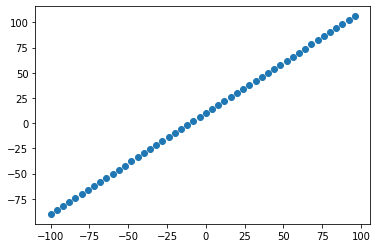

In [ ]:
# Visualize the data with matplotlib
plt.scatter(X,y)

# Splitting the dataset

1. **The training set** - The model learns from this data, which is typically 70-80% of the total data

2. **Validation set** - The model gets tuned in this data, which is typically 10-15%
of the total data.

3. **Test set** - the model gets evaluated in this set to test what it has learned,
this set is typically 10-15% of the total data available



In [ ]:
# Check the length of sample we have
len(X)

50

In [ ]:
# Splitting the data in train and test sets
X_train = X[:40] # First 40 samples(80% of the data)
y_train = y[:40]

X_test = X[40:]  # Last 10 are testing samples (20% of the data)
y_test = y[40:] 

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Visualizing the data

Now we got our train and test datawe visualize again

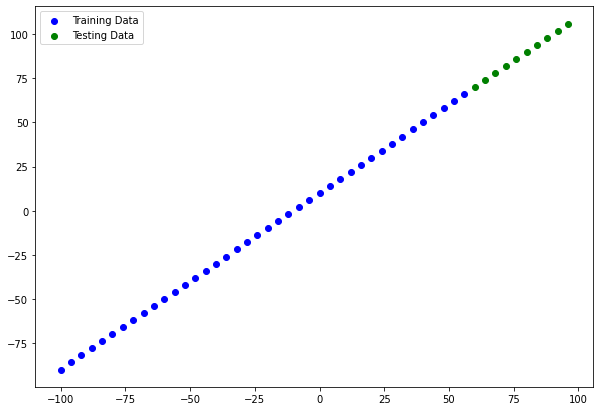

In [ ]:
plt.figure(figsize=(10,7))

# Plot training data in blue
plt.scatter(X_train,y_train, c="b", label="Training Data") # model will learn on this data

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing Data")   # model will be evaluated in this data

# Show a legend
plt.legend()

In [ ]:
# Build the neural network from our data

# 1. Create a model - 
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(1)    
    ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the data
#model.fit(X_train,y_train, epochs=100)

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
# Let's create a model automatically by defining the input_shape arguement in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential(name="model_1")
model.add(tf.keras.layers.Dense(10, input_shape=[1])) # shape of the data what we are passing to the model
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary() 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


1. Total params - Total number of parameters in the model.

2. Trainable parameters - These are the parameters (patterns) the model can update as it trains.

3. Non-trainable params -  These are already trained parameters, not required to trained ( this is typical when you bring in already learned patterns or 
parameters from other models during **transfer learning** ) 

In [ ]:
# Lets fit the model with our training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose hides the training progress

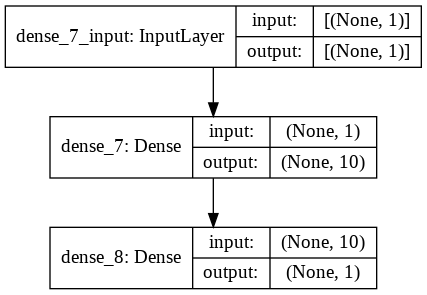

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True)

# Visualizing our model's predictions

To visualize predictions, it's good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test or y_true vs y_pred (ground truth vs your model's prediction)

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[1613.5109],
       [1615.5264],
       [1617.542 ],
       [1619.5576],
       [1621.5734],
       [1623.5887],
       [1625.6046],
       [1627.62  ],
       [1629.6356],
       [1631.651 ],
       [1633.6669],
       [1635.6823],
       [1637.6979],
       [1639.7135],
       [1641.7292],
       [1643.7446],
       [1645.7601],
       [1647.7762],
       [1649.7917],
       [1651.8071],
       [1653.823 ],
       [1655.8384],
       [1657.854 ],
       [1659.8695],
       [1661.885 ],
       [1663.9009],
       [1665.9164],
       [1667.9319],
       [1669.9478],
       [1671.9633],
       [1673.9788],
       [1675.9944],
       [1678.01  ],
       [1680.0255],
       [1682.0413],
       [1684.0566],
       [1686.0725],
       [1688.0879],
       [1690.1036],
       [1692.119 ],
       [1694.1346],
       [1696.1503],
       [1698.1659],
       [1700.1813],
       [1702.1968],
       [1704.2128],
       [1706.2285],
       [1708.2438],
       [1710.2594],
       [1712.275 ],


In [ ]:
y_test

<tf.Tensor: shape=(200,), dtype=int32, numpy=
array([1611, 1613, 1615, 1617, 1619, 1621, 1623, 1625, 1627, 1629, 1631,
       1633, 1635, 1637, 1639, 1641, 1643, 1645, 1647, 1649, 1651, 1653,
       1655, 1657, 1659, 1661, 1663, 1665, 1667, 1669, 1671, 1673, 1675,
       1677, 1679, 1681, 1683, 1685, 1687, 1689, 1691, 1693, 1695, 1697,
       1699, 1701, 1703, 1705, 1707, 1709, 1711, 1713, 1715, 1717, 1719,
       1721, 1723, 1725, 1727, 1729, 1731, 1733, 1735, 1737, 1739, 1741,
       1743, 1745, 1747, 1749, 1751, 1753, 1755, 1757, 1759, 1761, 1763,
       1765, 1767, 1769, 1771, 1773, 1775, 1777, 1779, 1781, 1783, 1785,
       1787, 1789, 1791, 1793, 1795, 1797, 1799, 1801, 1803, 1805, 1807,
       1809, 1811, 1813, 1815, 1817, 1819, 1821, 1823, 1825, 1827, 1829,
       1831, 1833, 1835, 1837, 1839, 1841, 1843, 1845, 1847, 1849, 1851,
       1853, 1855, 1857, 1859, 1861, 1863, 1865, 1867, 1869, 1871, 1873,
       1875, 1877, 1879, 1881, 1883, 1885, 1887, 1889, 1891, 1893, 1895,
     

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Test data")

  # Plot model's prediction in red
  plt.scatter(test_data, predictions, c="red", label="Predictions")

  # Show the legend
  plt.legend()

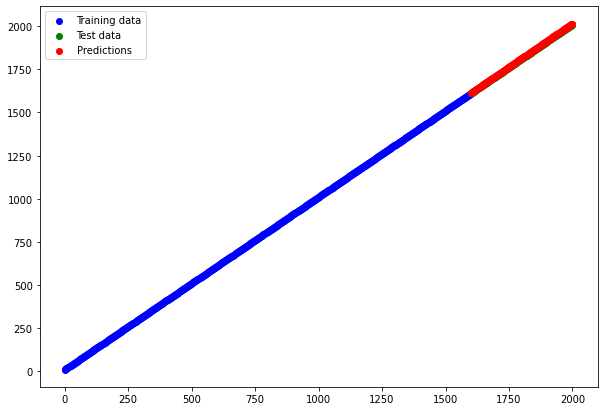

In [ ]:
plot_predictions()

# Evaluating our model's predictions with regression evaluation metrics

Depending upon your problem you are working on, there will be different evaluation metrics to evaluate your model's performance.

Since we are working on regression, two of the main metrics:

1. **MAE** - mean absolute error, "on average, how wrong is each of my model's predictions".

2. **MSE** - mean square error, "square the average errors".

In [ ]:
# Evaluate the model on test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 117ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
# Calculate the mean absolute error
mae = tf.keras.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [ ]:
tf.constant(y_pred)   # shape is(10,1)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [ ]:
y_test               # shape is (10,)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Removing the extra dimension from the y_pred
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error once again
mae = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred)) # Same result as evaluate function
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
# calculate the mean squared error
tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
# Let's make function for MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.keras.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

# Running experiments to improve our model

Build a model ->fit it -> evaluate it ->...

1. Get more data - Get more examples for your model to train on 
(more opportunities to learn pattern or relationships between
features and labels). 

2. Make your model larger (using more complex model) - this might
come in the form of more layers or hidden units in each layer.

3. Train for longer - give your model more of a chance to find 
patterns in the data. 

Let's do 3 modelling experiments :

1. 'model_1' - same as original model, 1 layer trained for 
100 epochs.
2. 'model_2' - 2 layers, trained for 100 epochs.
3. 'model_3' - 2 layers, trained for 500 epochs.

###**Build model_1**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
        tf.keras.layers.Dense(1)                     
]) 

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100, verbose=0)


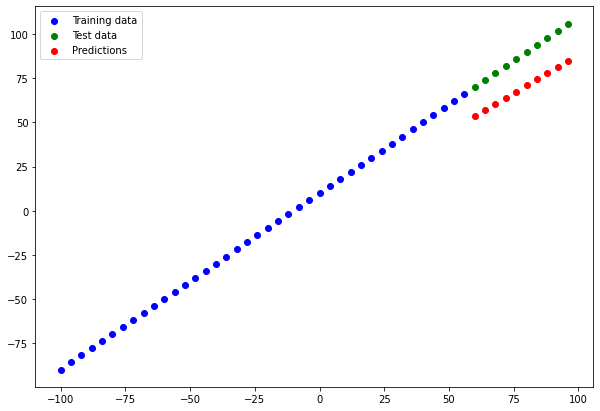

In [ ]:
# Make and plot predictions for "model_1"

y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

###**Build model_2**

2 dense layer for 100 epochs

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)                     
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

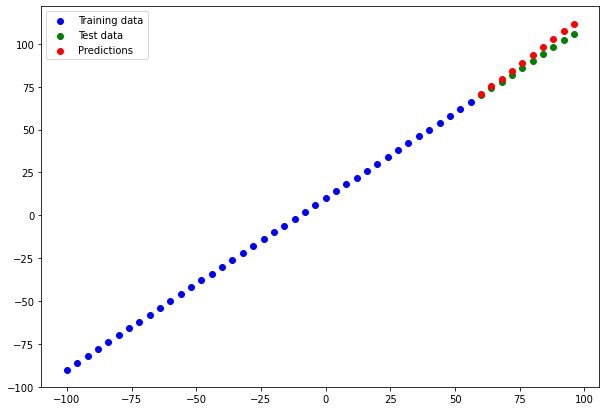

In [ ]:
# Make plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics

mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

###**Build model_3 with 500 epochs**

2 layers, trained for 500 epochs

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
model_3 =  tf.keras.Sequential([
           tf.keras.layers.Dense(10),
           tf.keras.layers.Dense(1)                     
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_train,y_train, epochs=500, verbose=0)

KeyboardInterrupt: ignored

In [ ]:
# Make plot predictions of model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

# Comparing the results of our experiments

Lets compare the results

In [ ]:
# Lets compare the results using pandas dataframe
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results                 

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [ ]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# Saving our models

Saving our models allows us to use them outside of Google Colab ( or
wherever they are trained) such as in web application or mobile app.

There are two main format we can save our models :

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save a model using SavedModel format
model_2.save("best_model_SavedModel format")

NameError: ignored

In [ ]:
# Saving the model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

NameError: ignored

# Loading a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel format")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in the model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# Practice Session 1

In [ ]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
# Create dataset
X = np.array([-7.0, -4.0, -2.0, 1.0, 5.0, 8.0, 10.0])
y = np.array([3.0,6.0,8.0, 11.0, 15.0, 18.0, 20.0]) # Trend is y=X+10

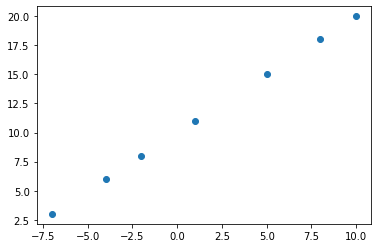

In [ ]:
# Visualize the data
plt.scatter(X,y)

In [ ]:
# Convert the data to tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(7,), dtype=float64, numpy=array([-7., -4., -2.,  1.,  5.,  8., 10.])>,
 <tf.Tensor: shape=(7,), dtype=float64, numpy=array([ 3.,  6.,  8., 11., 15., 18., 20.])>)

In [ ]:
X.shape, y.shape, X.ndim, y.ndim

(TensorShape([7]), TensorShape([7]), 1, 1)

In [ ]:
# Create the neural Network model
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)                     
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Train the model
model_1.fit(X,y, epochs=50, verbose=0)

In [ ]:
# model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.predict([18.0]) # Prediction is bad

array([[34.173527]], dtype=float32)

In [ ]:
# Improve the model
tf.random.set_seed(42)

# 1. Create the model once again
model_2 = tf.keras.Sequential([
          tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)                     
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.10),
                metrics=["mae"])

# Training the model
model_2.fit(X,y, epochs=100, verbose=0)

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.predict([18.0]) # Excellent prediction

array([[27.837711]], dtype=float32)

In [ ]:
# Create a dataset
X = tf.range(1,500, 4)
X

<tf.Tensor: shape=(125,), dtype=int32, numpy=
array([  1,   5,   9,  13,  17,  21,  25,  29,  33,  37,  41,  45,  49,
        53,  57,  61,  65,  69,  73,  77,  81,  85,  89,  93,  97, 101,
       105, 109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149, 153,
       157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197, 201, 205,
       209, 213, 217, 221, 225, 229, 233, 237, 241, 245, 249, 253, 257,
       261, 265, 269, 273, 277, 281, 285, 289, 293, 297, 301, 305, 309,
       313, 317, 321, 325, 329, 333, 337, 341, 345, 349, 353, 357, 361,
       365, 369, 373, 377, 381, 385, 389, 393, 397, 401, 405, 409, 413,
       417, 421, 425, 429, 433, 437, 441, 445, 449, 453, 457, 461, 465,
       469, 473, 477, 481, 485, 489, 493, 497], dtype=int32)>

In [ ]:
# Create the labels for dataset
y = X+10
y

<tf.Tensor: shape=(125,), dtype=int32, numpy=
array([ 11,  15,  19,  23,  27,  31,  35,  39,  43,  47,  51,  55,  59,
        63,  67,  71,  75,  79,  83,  87,  91,  95,  99, 103, 107, 111,
       115, 119, 123, 127, 131, 135, 139, 143, 147, 151, 155, 159, 163,
       167, 171, 175, 179, 183, 187, 191, 195, 199, 203, 207, 211, 215,
       219, 223, 227, 231, 235, 239, 243, 247, 251, 255, 259, 263, 267,
       271, 275, 279, 283, 287, 291, 295, 299, 303, 307, 311, 315, 319,
       323, 327, 331, 335, 339, 343, 347, 351, 355, 359, 363, 367, 371,
       375, 379, 383, 387, 391, 395, 399, 403, 407, 411, 415, 419, 423,
       427, 431, 435, 439, 443, 447, 451, 455, 459, 463, 467, 471, 475,
       479, 483, 487, 491, 495, 499, 503, 507], dtype=int32)>

In [ ]:
len(X)

125

In [ ]:
# Ceate train test data 
X_train = X[:100]
X_test = X[100:]
len(X_train), len(X_test)

(100, 25)

In [ ]:
# Create train test data for labels
y_train = y[:100]
y_test = y[100:]
len(y_train), len(y_test)

(100, 25)

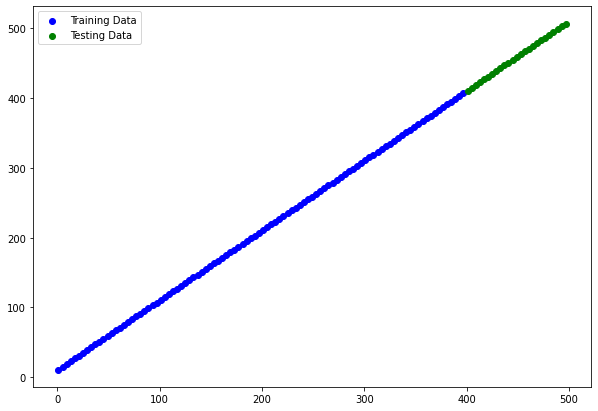

In [ ]:
# Visualize the data
plt.figure(figsize=(10,7))

# Plot the training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")

# Plot the testing data in green
plt.scatter(X_test,y_test, c="g", label="Testing Data")

plt.legend()

In [ ]:
# Build the neural network
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
          tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(10),                     
          tf.keras.layers.Dense(1)                     
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

# Fit the model
model_1.fit(X_train,y_train, epochs=400)

Epoch 1/400
4/4 [==============================] - 0s 4ms/step - loss: 240.6678 - mae: 240.6678
Epoch 2/400
4/4 [==============================] - 0s 4ms/step - loss: 91.8054 - mae: 91.8054
Epoch 3/400
4/4 [==============================] - 0s 4ms/step - loss: 63.1159 - mae: 63.1159
Epoch 4/400
4/4 [==============================] - 0s 6ms/step - loss: 68.1261 - mae: 68.1261
Epoch 5/400
4/4 [==============================] - 0s 5ms/step - loss: 90.4482 - mae: 90.4482
Epoch 6/400
4/4 [==============================] - 0s 4ms/step - loss: 45.7665 - mae: 45.7665
Epoch 7/400
4/4 [==============================] - 0s 5ms/step - loss: 46.6752 - mae: 46.6752
Epoch 8/400
4/4 [==============================] - 0s 5ms/step - loss: 69.9955 - mae: 69.9955
Epoch 9/400
4/4 [==============================] - 0s 5ms/step - loss: 35.2692 - mae: 35.2692
Epoch 10/400
4/4 [==============================] - 0s 5ms/step - loss: 16.1271 - mae: 16.1271
Epoch 11/400
4/4 [==============================] - 0s 7m

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = model_1.predict(X_test)
y_pred

array([[418.12128],
       [422.18982],
       [426.25806],
       [430.32642],
       [434.3947 ],
       [438.46313],
       [442.53156],
       [446.59985],
       [450.66812],
       [454.73663],
       [458.80496],
       [462.87326],
       [466.94153],
       [471.00995],
       [475.07828],
       [479.14682],
       [483.21497],
       [487.28348],
       [491.35187],
       [495.4202 ],
       [499.48843],
       [503.55685],
       [507.62515],
       [511.69354],
       [515.7619 ]], dtype=float32)

In [ ]:
X_test, X_test.ndim

(<tf.Tensor: shape=(25,), dtype=int32, numpy=
 array([401, 405, 409, 413, 417, 421, 425, 429, 433, 437, 441, 445, 449,
        453, 457, 461, 465, 469, 473, 477, 481, 485, 489, 493, 497],
       dtype=int32)>, 1)

In [ ]:
# Evaluate the model
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 125ms/step - loss: 7.9416 - mae: 7.9416


[7.94163703918457, 7.94163703918457]

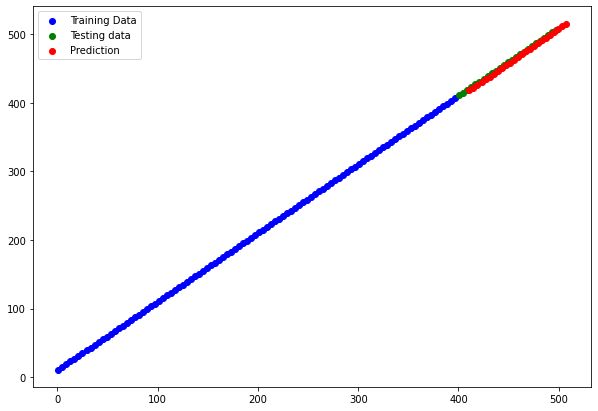

In [ ]:
# Visualize the test predictions

plt.figure(figsize=(10,7))

# Plot train data in blue
plt.scatter(X_train,y_train,c="b", label="Training Data")

# Plot test data in green 
plt.scatter(X_test,y_test, c="g", label="Testing data")

# Plot the prediction in red 
plt.scatter(y_test, y_pred, c="r", label="Prediction")

plt.legend()

In [ ]:
y_pred.shape, y_test.shape # Since these are not in same shape, prediction has to be squeezed

((25, 1), TensorShape([25]))

In [ ]:
# Metrics evaluation

# Mean absolute error
mae = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

# Mean Squared Error
mse = tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

mae, mse

(<tf.Tensor: shape=(), dtype=float32, numpy=7.941631>,
 <tf.Tensor: shape=(), dtype=float32, numpy=63.312477>)

# Practice Session 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [ ]:
# Create a dataset
X = tf.range(1,1000,2)
X

<tf.Tensor: shape=(500,), dtype=int32, numpy=
array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207,
       209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233,
       235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259,
       261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285,
       287, 289, 291, 293, 295, 297, 299, 301, 303, 305, 307, 309, 311,
       313, 315, 317, 319, 321, 323, 325, 327, 329, 331, 333, 335, 337,
       339, 341, 3

In [ ]:
len(X)

500

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(500,), dtype=int32, numpy=
array([  11,   13,   15,   17,   19,   21,   23,   25,   27,   29,   31,
         33,   35,   37,   39,   41,   43,   45,   47,   49,   51,   53,
         55,   57,   59,   61,   63,   65,   67,   69,   71,   73,   75,
         77,   79,   81,   83,   85,   87,   89,   91,   93,   95,   97,
         99,  101,  103,  105,  107,  109,  111,  113,  115,  117,  119,
        121,  123,  125,  127,  129,  131,  133,  135,  137,  139,  141,
        143,  145,  147,  149,  151,  153,  155,  157,  159,  161,  163,
        165,  167,  169,  171,  173,  175,  177,  179,  181,  183,  185,
        187,  189,  191,  193,  195,  197,  199,  201,  203,  205,  207,
        209,  211,  213,  215,  217,  219,  221,  223,  225,  227,  229,
        231,  233,  235,  237,  239,  241,  243,  245,  247,  249,  251,
        253,  255,  257,  259,  261,  263,  265,  267,  269,  271,  273,
        275,  277,  279,  281,  283,  285,  287,  289,  291,  293,  295,
     

In [ ]:
# Train test split

X_train = X[:400]
y_train = y[:400]

X_test = X[400:]
y_test = y[400:]

len(X_train), len(y_train), len(X_test), len(y_test)

(400, 400, 100, 100)

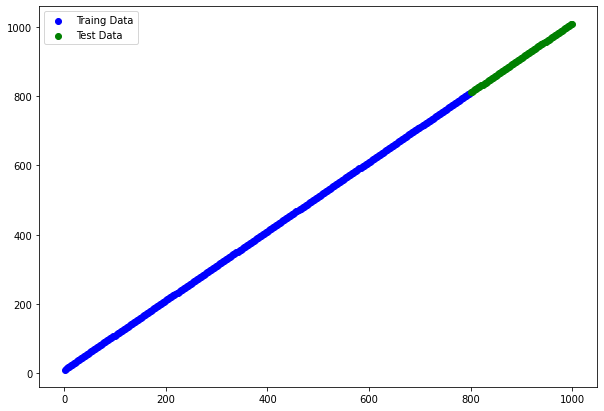

In [ ]:
# Visualize the data
plt.figure(figsize=(10,7))

# Plot the train data in blue
plt.scatter(X_train,y_train, c="b", label="Traing Data")

# Plot the test data in green
plt.scatter(X_test,y_test, c="g", label="Test Data")

plt.legend()

In [ ]:
# Build the neural network
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(100), 
        tf.keras.layers.Dense(100),                    
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.0001),
              metrics=["mae"])


# 3. Fit the model
history = model.fit(X_train, y_train, epochs=300, verbose=2)

Epoch 1/300
13/13 - 0s - loss: 469.9494 - mae: 469.9494
Epoch 2/300
13/13 - 0s - loss: 444.3094 - mae: 444.3094
Epoch 3/300
13/13 - 0s - loss: 427.8482 - mae: 427.8482
Epoch 4/300
13/13 - 0s - loss: 414.5951 - mae: 414.5951
Epoch 5/300
13/13 - 0s - loss: 403.0508 - mae: 403.0508
Epoch 6/300
13/13 - 0s - loss: 392.7948 - mae: 392.7948
Epoch 7/300
13/13 - 0s - loss: 383.4096 - mae: 383.4096
Epoch 8/300
13/13 - 0s - loss: 374.7103 - mae: 374.7103
Epoch 9/300
13/13 - 0s - loss: 366.5162 - mae: 366.5162
Epoch 10/300
13/13 - 0s - loss: 358.8108 - mae: 358.8108
Epoch 11/300
13/13 - 0s - loss: 351.4561 - mae: 351.4561
Epoch 12/300
13/13 - 0s - loss: 344.4094 - mae: 344.4094
Epoch 13/300
13/13 - 0s - loss: 337.7097 - mae: 337.7097
Epoch 14/300
13/13 - 0s - loss: 331.2709 - mae: 331.2709
Epoch 15/300
13/13 - 0s - loss: 325.0359 - mae: 325.0359
Epoch 16/300
13/13 - 0s - loss: 318.9895 - mae: 318.9895
Epoch 17/300
13/13 - 0s - loss: 313.1801 - mae: 313.1801
Epoch 18/300
13/13 - 0s - loss: 307.4922

In [ ]:
# Evaluate the model
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 5.7156 - mae: 5.7156


[5.715597152709961, 5.715597152709961]

In [ ]:
y_preds = model.predict(X_test)
y_preds

array([[ 815.0164 ],
       [ 817.0507 ],
       [ 819.0851 ],
       [ 821.11926],
       [ 823.1537 ],
       [ 825.18805],
       [ 827.2224 ],
       [ 829.2567 ],
       [ 831.291  ],
       [ 833.3254 ],
       [ 835.3597 ],
       [ 837.394  ],
       [ 839.4285 ],
       [ 841.4625 ],
       [ 843.4969 ],
       [ 845.5313 ],
       [ 847.56573],
       [ 849.6    ],
       [ 851.63434],
       [ 853.6684 ],
       [ 855.70306],
       [ 857.7372 ],
       [ 859.7715 ],
       [ 861.80585],
       [ 863.84015],
       [ 865.8746 ],
       [ 867.9089 ],
       [ 869.94324],
       [ 871.97754],
       [ 874.01184],
       [ 876.0462 ],
       [ 878.08057],
       [ 880.1152 ],
       [ 882.14923],
       [ 884.1836 ],
       [ 886.21783],
       [ 888.2523 ],
       [ 890.28656],
       [ 892.3209 ],
       [ 894.35516],
       [ 896.3894 ],
       [ 898.42377],
       [ 900.4581 ],
       [ 902.49243],
       [ 904.5268 ],
       [ 906.56116],
       [ 908.59546],
       [ 910.

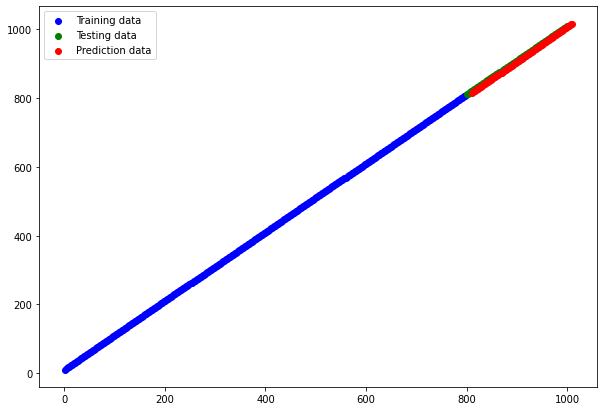

In [ ]:
# Visualize the test prediction

plt.figure(figsize=(10,7))

# Show the training data in green
plt.scatter(X_train, y_train, c="b", label="Training data")

# Show the testing data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

# Show prediction data in red
plt.scatter(y_test,y_preds,c="r", label="Prediction data")

plt.legend()

Text(0, 0.5, 'Loss')

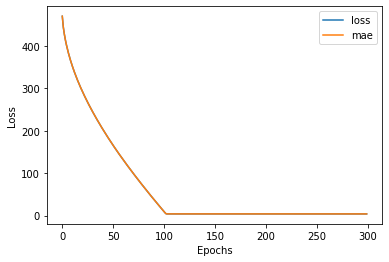

In [ ]:
# Show the performance history of the model also known as loss curve or trainig curve
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Practice Session 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
# Create a dataset
X = tf.range(1,2000,2)
X

<tf.Tensor: shape=(1000,), dtype=int32, numpy=
array([   1,    3,    5,    7,    9,   11,   13,   15,   17,   19,   21,
         23,   25,   27,   29,   31,   33,   35,   37,   39,   41,   43,
         45,   47,   49,   51,   53,   55,   57,   59,   61,   63,   65,
         67,   69,   71,   73,   75,   77,   79,   81,   83,   85,   87,
         89,   91,   93,   95,   97,   99,  101,  103,  105,  107,  109,
        111,  113,  115,  117,  119,  121,  123,  125,  127,  129,  131,
        133,  135,  137,  139,  141,  143,  145,  147,  149,  151,  153,
        155,  157,  159,  161,  163,  165,  167,  169,  171,  173,  175,
        177,  179,  181,  183,  185,  187,  189,  191,  193,  195,  197,
        199,  201,  203,  205,  207,  209,  211,  213,  215,  217,  219,
        221,  223,  225,  227,  229,  231,  233,  235,  237,  239,  241,
        243,  245,  247,  249,  251,  253,  255,  257,  259,  261,  263,
        265,  267,  269,  271,  273,  275,  277,  279,  281,  283,  285,
    

In [ ]:
# Create label for the dataset
y = X + 10
y

<tf.Tensor: shape=(1000,), dtype=int32, numpy=
array([  11,   13,   15,   17,   19,   21,   23,   25,   27,   29,   31,
         33,   35,   37,   39,   41,   43,   45,   47,   49,   51,   53,
         55,   57,   59,   61,   63,   65,   67,   69,   71,   73,   75,
         77,   79,   81,   83,   85,   87,   89,   91,   93,   95,   97,
         99,  101,  103,  105,  107,  109,  111,  113,  115,  117,  119,
        121,  123,  125,  127,  129,  131,  133,  135,  137,  139,  141,
        143,  145,  147,  149,  151,  153,  155,  157,  159,  161,  163,
        165,  167,  169,  171,  173,  175,  177,  179,  181,  183,  185,
        187,  189,  191,  193,  195,  197,  199,  201,  203,  205,  207,
        209,  211,  213,  215,  217,  219,  221,  223,  225,  227,  229,
        231,  233,  235,  237,  239,  241,  243,  245,  247,  249,  251,
        253,  255,  257,  259,  261,  263,  265,  267,  269,  271,  273,
        275,  277,  279,  281,  283,  285,  287,  289,  291,  293,  295,
    

In [ ]:
len(X)

1000

In [ ]:
# Train and Test split
X_train = X[:800]
y_train = y[:800]

X_test = X[800:]
y_test = y[800:]
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

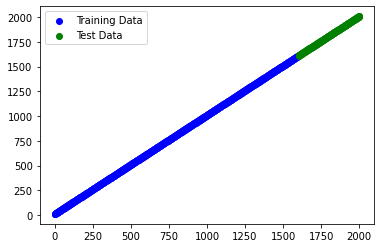

In [ ]:
# Visualize the data

# Plot the train data in blue color
plt.scatter(X_train, y_train , c="blue", label="Training Data")

# Plot the test data in green color
plt.scatter(X_test, y_test, color="g", label="Test Data")

plt.legend()

In [ ]:
# Build the model
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, input_shape=[1], name="Input_Layer"),
        tf.keras.layers.Dense(100, name="Hidden_Layer"),
        tf.keras.layers.Dense(1, name="Output_Layer")                     
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.000001),
              metrics=["mae"])

# 3. Fit the model
history=model.fit(X_train, y_train, epochs=500)

Epoch 1/500
25/25 [==============================] - 0s 1ms/step - loss: 829.0779 - mae: 829.0779
Epoch 2/500
25/25 [==============================] - 0s 1ms/step - loss: 717.6585 - mae: 717.6585
Epoch 3/500
25/25 [==============================] - 0s 1ms/step - loss: 605.2759 - mae: 605.2759
Epoch 4/500
25/25 [==============================] - 0s 1ms/step - loss: 490.9380 - mae: 490.9380
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 373.5650 - mae: 373.5650
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 252.1013 - mae: 252.1013
Epoch 7/500
25/25 [==============================] - 0s 1ms/step - loss: 125.3033 - mae: 125.3033
Epoch 8/500
25/25 [==============================] - 0s 2ms/step - loss: 15.8223 - mae: 15.8223
Epoch 9/500
25/25 [==============================] - 0s 1ms/step - loss: 4.4150 - mae: 4.4150
Epoch 10/500
25/25 [==============================] - 0s 1ms/step - loss: 4.3958 - mae: 4.3958
Epoch 11/500
25/25 [=========

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 100)               200       
_________________________________________________________________
Hidden_Layer (Dense)         (None, 100)               10100     
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


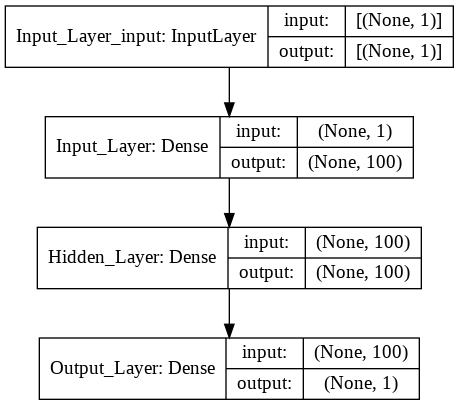

In [ ]:
# See the layers graphically
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [ ]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 4.0626 - mae: 4.0626


[4.062559127807617, 4.062559127807617]

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[1613.5109],
       [1615.5264],
       [1617.542 ],
       [1619.5576],
       [1621.5734],
       [1623.5887],
       [1625.6046],
       [1627.62  ],
       [1629.6356],
       [1631.651 ],
       [1633.6669],
       [1635.6823],
       [1637.6979],
       [1639.7135],
       [1641.7292],
       [1643.7446],
       [1645.7601],
       [1647.7762],
       [1649.7917],
       [1651.8071],
       [1653.823 ],
       [1655.8384],
       [1657.854 ],
       [1659.8695],
       [1661.885 ],
       [1663.9009],
       [1665.9164],
       [1667.9319],
       [1669.9478],
       [1671.9633],
       [1673.9788],
       [1675.9944],
       [1678.01  ],
       [1680.0255],
       [1682.0413],
       [1684.0566],
       [1686.0725],
       [1688.0879],
       [1690.1036],
       [1692.119 ],
       [1694.1346],
       [1696.1503],
       [1698.1659],
       [1700.1813],
       [1702.1968],
       [1704.2128],
       [1706.2285],
       [1708.2438],
       [1710.2594],
       [1712.275 ],


In [ ]:
# Find the mean absolute error
mae = tf.keras.metrics.mean_absolute_error(X_test, tf.squeeze(y_pred))

# Find the mean squared error
mse = tf.keras.metrics.mean_squared_error(X_test,tf.squeeze(y_pred))
mae, mse

(<tf.Tensor: shape=(), dtype=float32, numpy=14.062556>,
 <tf.Tensor: shape=(), dtype=float32, numpy=198.5661>)

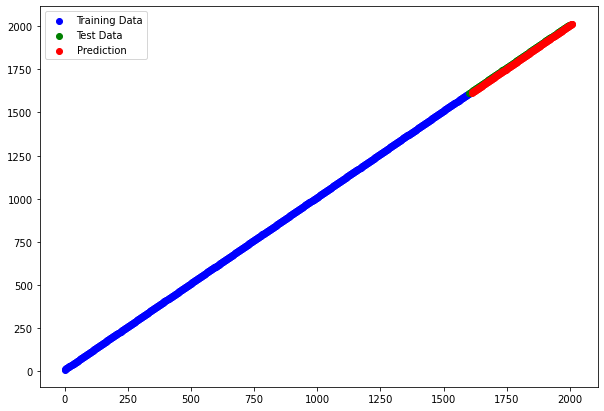

In [ ]:
# Visualize the prediction

plt.figure(figsize=(10,7))

# Plot the training data in blue
plt.scatter(X_train,y_train, c="b", label="Training Data")

# Plot the Test data
plt.scatter(X_test, y_test, c="g", label="Test Data")

# Plot the prediction data in the plot in red
plt.scatter(y_test, y_pred, c="r", label="Prediction")

plt.legend()

Text(0, 0.5, 'Loss')

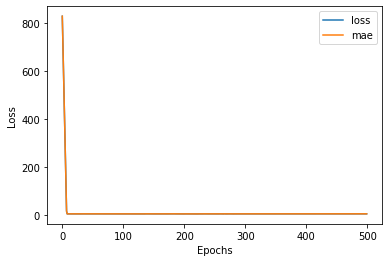

In [ ]:
# Show the history of training curve or loss curve

pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Practice Session 4

In [ ]:
# Import important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
# Create dataset
X = tf.range(1,3000,2)
X

<tf.Tensor: shape=(1500,), dtype=int32, numpy=array([   1,    3,    5, ..., 2995, 2997, 2999], dtype=int32)>

In [ ]:
X.shape, X.ndim

(TensorShape([1500]), 1)

In [ ]:
# Create the labels
y = X + 10
y

<tf.Tensor: shape=(1500,), dtype=int32, numpy=array([  11,   13,   15, ..., 3005, 3007, 3009], dtype=int32)>

In [ ]:
len(X)

1500

In [ ]:
# Create Train and test sets
X_train = X[:1200]
y_train = X[:1200]

X_test = X[1200:]
y_test = y[1200:]
len(X_train), len(y_train), len(X_test), len(y_test), X_train.shape

(1200, 1200, 300, 300, TensorShape([1200]))

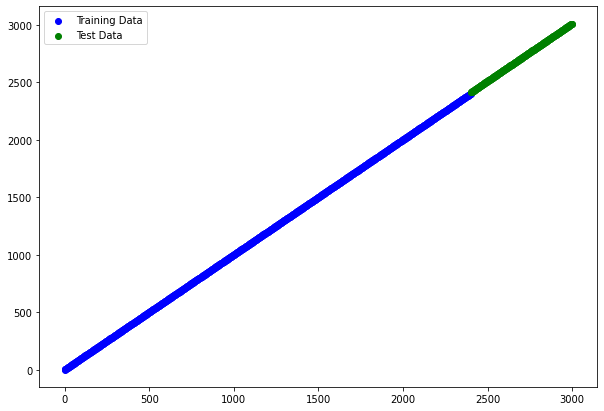

In [ ]:
# Visualize the data

plt.figure(figsize=(10,7))

# Plot train data in blue color
plt.scatter(X_train,y_train, c="b", label="Training Data")

# Plot Test data in green
plt.scatter(X_test, y_test, c="g", label="Test Data")

plt.legend()

In [ ]:
# Build the neural network model
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, input_shape=[1], name="Input_Layer"),
        tf.keras.layers.Dense(100, name="Hidden_Layer"),
        tf.keras.layers.Dense(10, name="Hidden_Layer1"),
        tf.keras.layers.Dense(1, name="Output_Layer")                     
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

# 3. Fit the model
history=model.fit(X_train, y_train, epochs=500)

Epoch 1/500
38/38 [==============================] - 0s 2ms/step - loss: 283.0221 - mae: 283.0221
Epoch 2/500
38/38 [==============================] - 0s 2ms/step - loss: 21.5754 - mae: 21.5754
Epoch 3/500
38/38 [==============================] - 0s 2ms/step - loss: 16.0561 - mae: 16.0561
Epoch 4/500
38/38 [==============================] - 0s 3ms/step - loss: 22.4093 - mae: 22.4093
Epoch 5/500
38/38 [==============================] - 0s 2ms/step - loss: 15.4958 - mae: 15.4958
Epoch 6/500
38/38 [==============================] - 0s 2ms/step - loss: 14.7376 - mae: 14.7376
Epoch 7/500
38/38 [==============================] - 0s 2ms/step - loss: 11.0109 - mae: 11.0109
Epoch 8/500
38/38 [==============================] - 0s 2ms/step - loss: 13.0159 - mae: 13.0159
Epoch 9/500
38/38 [==============================] - 0s 2ms/step - loss: 19.7507 - mae: 19.7507
Epoch 10/500
38/38 [==============================] - 0s 2ms/step - loss: 21.3622 - mae: 21.3622
Epoch 11/500
38/38 [=================

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 100)               200       
_________________________________________________________________
Hidden_Layer (Dense)         (None, 100)               10100     
_________________________________________________________________
Hidden_Layer1 (Dense)        (None, 10)                1010      
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 11        
Total params: 11,321
Trainable params: 11,321
Non-trainable params: 0
_________________________________________________________________


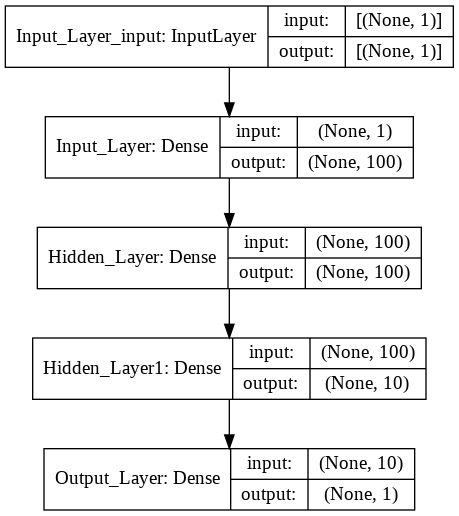

In [ ]:
# Visualize graphically the model
from tensorflow.keras.utils import plot_model

plot_model(model=model, 
           show_shapes=True,
           show_layer_names=True)

In [ ]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 8.4197 - mae: 8.4197


[8.41966724395752, 8.41966724395752]

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Check the mean absolute error
mae = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

# Check the mean squared error
mse = tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mae.numpy(), mse.numpy()

(8.419668, 70.90086)

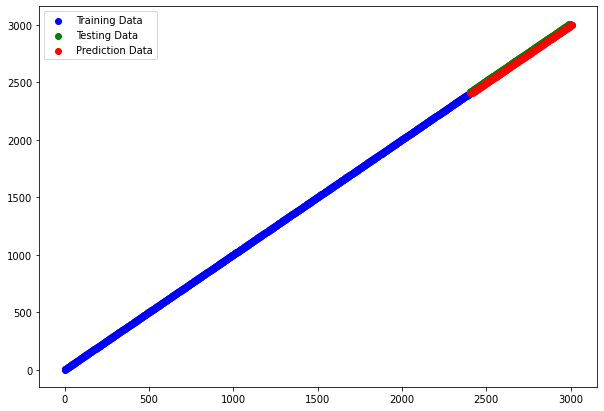

In [ ]:
# Plot the prediction to visualize

plt.figure(figsize=(10,7))

# Plot the training data in blue
plt.scatter(X_train,y_train,c="b", label="Training Data")

# Plot the testing data in green
plt.scatter(X_test, y_test, c="g", label="Testing Data")

# Plot the prediction in red
plt.scatter(y_test, y_pred, c="r", label="Prediction Data")

plt.legend()

Text(0, 0.5, 'Loss')

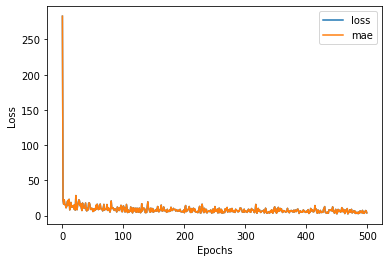

In [ ]:
# Visualize the learning rate from the history of the learning of the model
pd.DataFrame(history.history).plot()

plt.xlabel("Epochs")
plt.ylabel("Loss")

# Practice Session 5

In [ ]:
# Import important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
# Create dataset
X = tf.range(1,4000,2)
X.shape, X.ndim

(TensorShape([2000]), 1)

In [ ]:
# Create labels for the data
y = X + 10
y.shape, y.ndim

(TensorShape([2000]), 1)

In [ ]:
len(X)

2000

In [ ]:
# Create Train test sets
X_train = X[:1600]
y_train = y[:1600]

X_test = X[1600:]
y_test = y[1600:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1600, 1600, 400, 400)

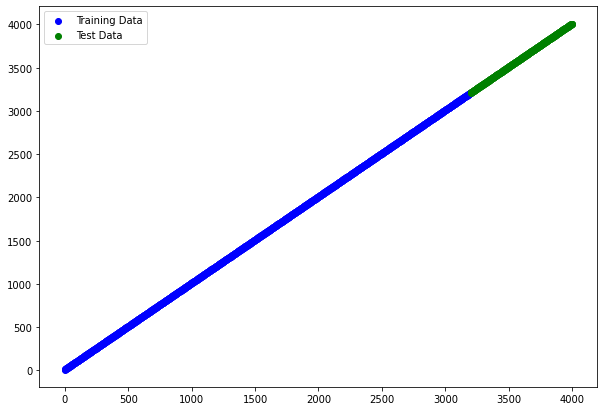

In [ ]:
# Visualize the Train and test set

plt.figure(figsize=(10,7))

# Plot the Train data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")

# Plot theTest data in green
plt.scatter(X_test,y_test, c="g", label="Test Data")

plt.legend()

In [ ]:
# Build the model

# 1 . Create the model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)                     
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adamax(learning_rate=1e-4),
              metrics=["mae"])

# 3. Fit the model
history=model.fit(X_train, y_train, epochs=500)

Epoch 1/500
50/50 [==============================] - 0s 1ms/step - loss: 471.6335 - mae: 471.6335
Epoch 2/500
50/50 [==============================] - 0s 2ms/step - loss: 14.3809 - mae: 14.3809
Epoch 3/500
50/50 [==============================] - 0s 1ms/step - loss: 4.4905 - mae: 4.4905
Epoch 4/500
50/50 [==============================] - 0s 2ms/step - loss: 4.8342 - mae: 4.8342
Epoch 5/500
50/50 [==============================] - 0s 2ms/step - loss: 5.3334 - mae: 5.3334
Epoch 6/500
50/50 [==============================] - 0s 1ms/step - loss: 4.6881 - mae: 4.6881
Epoch 7/500
50/50 [==============================] - 0s 2ms/step - loss: 4.2257 - mae: 4.2257
Epoch 8/500
50/50 [==============================] - 0s 2ms/step - loss: 4.5543 - mae: 4.5543
Epoch 9/500
50/50 [==============================] - 0s 1ms/step - loss: 4.5681 - mae: 4.5681
Epoch 10/500
50/50 [==============================] - 0s 2ms/step - loss: 4.8559 - mae: 4.8559
Epoch 11/500
50/50 [==============================] -

In [ ]:
# View the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 11,321
Trainable params: 11,321
Non-trainable params: 0
_________________________________________________________________


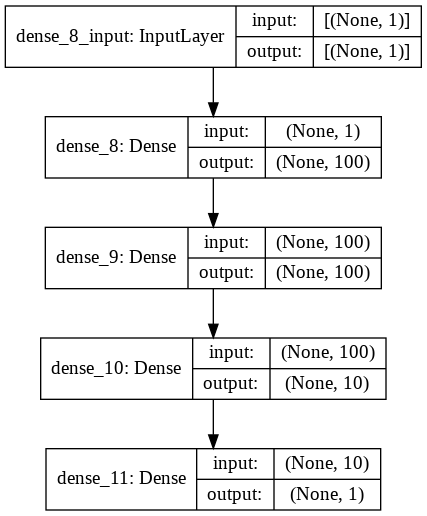

In [ ]:
# View the model graphically
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True, show_layer_names=True)

In [ ]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 1ms/step - loss: 4.6180 - mae: 4.6180


[4.617954254150391, 4.617954254150391]

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Calculate the mean absolute error
mae = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

# Calculate the mean squared error
mse = tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mae, mse

(<tf.Tensor: shape=(), dtype=float32, numpy=4.6179442>,
 <tf.Tensor: shape=(), dtype=float32, numpy=21.408476>)

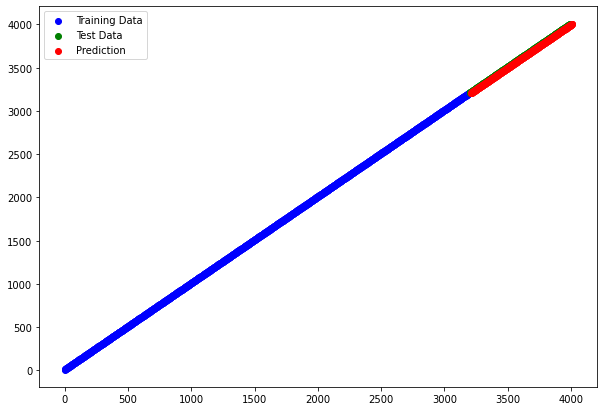

In [ ]:
# Visualize the prediction

plt.figure(figsize=(10,7))

# Plot the Training data in blue
plt.scatter(X_train,y_train, c="b", label="Training Data")

# Plot the Testing data in green
plt.scatter(X_test, y_test, c="g", label="Test Data")

# Plot the prediction data in red
plt.scatter(y_test,y_pred, c="r", label="Prediction")

plt.legend()

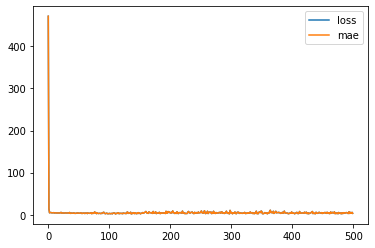

In [ ]:
# Visualize the training loss or loss curve

pd.DataFrame(history.history).plot()

plt.xlabel("Epochs")
plt.ylabel("Loss")

# Practice Session 6

In [1]:
# Import important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
tf.__version__

'2.6.0'

In [3]:
# Create the dataset
X = tf.range(1,5000,2)
X.shape, X.ndim

(TensorShape([2500]), 1)

In [4]:
# Create label for dataset
y = X + 10
y.shape, y.ndim

(TensorShape([2500]), 1)

In [5]:
len(X)

2500

In [6]:
# Create Train Test sets

X_train = X[:2000]
y_train = y[:2000]

X_test = X[2000:]
y_test = y[2000:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(TensorShape([2000]),
 TensorShape([2000]),
 TensorShape([500]),
 TensorShape([500]))

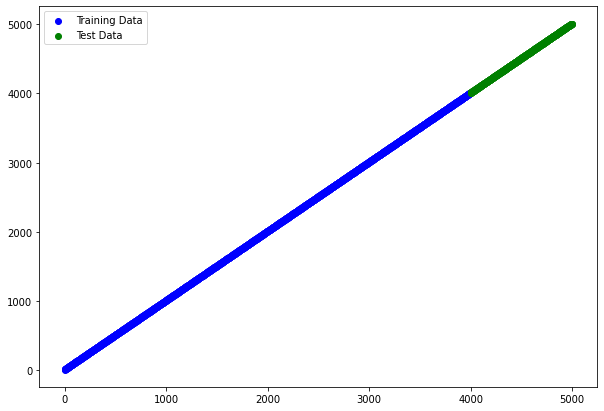

In [7]:
# Visualize the data

plt.figure(figsize=(10,7))

# Plot the Training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")

# Plot the Test data in green
plt.scatter(X_test, y_test, c="g", label="Test Data")

plt.legend()

In [10]:
# Build the model
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, input_shape=[1], name="Input_Layer"),
        tf.keras.layers.Dense(100, name="Hidden_Layer"),
        tf.keras.layers.Dense(10, name="Hidden_Layer1"),
        tf.keras.layers.Dense(1, name="Output_Layer")                     
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0001),
              metrics=["mae"])

# 3. Fit the model
history=model.fit(X_train, y_train, epochs=500)

Epoch 1/500
63/63 [==============================] - 1s 2ms/step - loss: 1559.6572 - mae: 1559.6572
Epoch 2/500
63/63 [==============================] - 0s 2ms/step - loss: 177.7546 - mae: 177.7546
Epoch 3/500
63/63 [==============================] - 0s 2ms/step - loss: 5.4742 - mae: 5.4742
Epoch 4/500
63/63 [==============================] - 0s 2ms/step - loss: 4.7478 - mae: 4.7478
Epoch 5/500
63/63 [==============================] - 0s 1ms/step - loss: 4.6356 - mae: 4.6356
Epoch 6/500
63/63 [==============================] - 0s 1ms/step - loss: 4.2493 - mae: 4.2493
Epoch 7/500
63/63 [==============================] - 0s 2ms/step - loss: 4.2871 - mae: 4.2871
Epoch 8/500
63/63 [==============================] - 0s 2ms/step - loss: 4.2529 - mae: 4.2529
Epoch 9/500
63/63 [==============================] - 0s 1ms/step - loss: 4.5617 - mae: 4.5617
Epoch 10/500
63/63 [==============================] - 0s 2ms/step - loss: 4.0429 - mae: 4.0429
Epoch 11/500
63/63 [=============================

In [11]:
# Summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 100)               200       
_________________________________________________________________
Hidden_Layer (Dense)         (None, 100)               10100     
_________________________________________________________________
Hidden_Layer1 (Dense)        (None, 10)                1010      
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 11        
Total params: 11,321
Trainable params: 11,321
Non-trainable params: 0
_________________________________________________________________


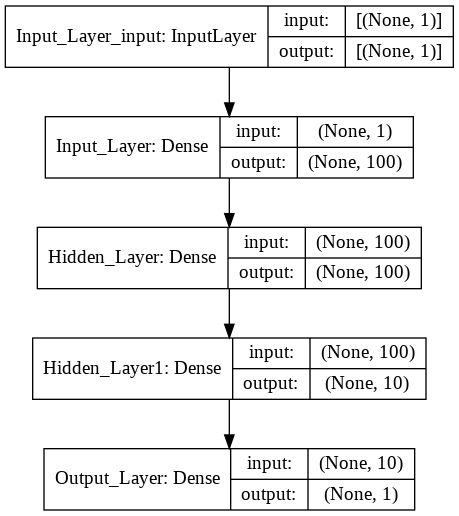

In [13]:
# Graphically visualize the model
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True, show_layer_names=True)

In [14]:
# Evaluate the model
model.evaluate(X_test,y_test)

16/16 [==============================] - 0s 2ms/step - loss: 9.5316 - mae: 9.5316


[9.531572341918945, 9.531572341918945]

In [15]:
# Prediction the model
y_pred = model.predict(X_test)

In [17]:
# Mean absolute error
mae = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

# Mean squared error
mse = tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))

mae.numpy(), mse.numpy()                                          

(9.531588, 91.22927)

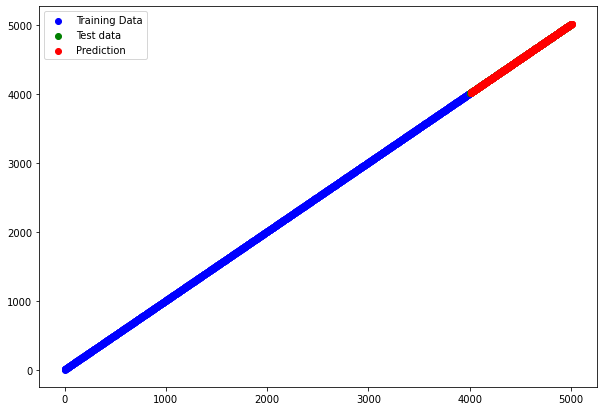

In [19]:
# Visualize the prediction

plt.figure(figsize=(10,7))

# Plot the Train data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")

# Plot the Test data in green
plt.scatter(X_test, y_test, c="g", label="Test data")

# plot the prediction on red
plt.scatter(y_test, y_pred, c="r", label="Prediction")

plt.legend()

Text(0, 0.5, 'Loss')

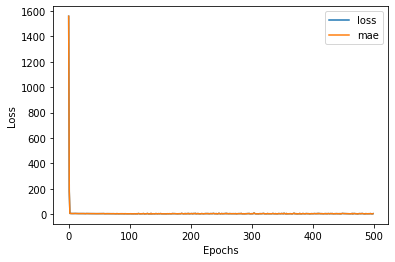

In [20]:
# Plot the training curve or the loss curve

pd.DataFrame(history.history).plot()

plt.xlabel("Epochs")
plt.ylabel("Loss")

# Practice Session 7

In [22]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [23]:
tf.__version__

'2.6.0'

In [27]:
# Create a dataset
X = tf.range(1,6000,2)
len(X), X.shape,X.ndim

(3000, TensorShape([3000]), 1)

In [28]:
# Create label for dtatset
y = X + 10
y.shape, y.ndim

(TensorShape([3000]), 1)

In [29]:
# create Train Test split
X_train = X[:2400]
y_train = y[:2400]

X_test = y[2400:]
y_test = y[2400:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(TensorShape([2400]),
 TensorShape([600]),
 TensorShape([2400]),
 TensorShape([600]))

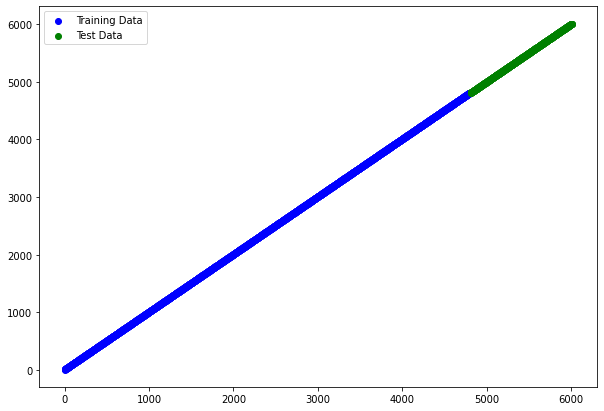

In [30]:
# Visualize the data

plt.figure(figsize=(10,7))

# Plot the training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")

# Plot the Test data in green
plt.scatter(X_test, y_test, c="g", label="Test Data")

plt.legend()

In [35]:
# Build the model
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, input_shape=[1], name="Input_Layer"),
        tf.keras.layers.Dense(100, name="Hidden_Layer1"),
        tf.keras.layers.Dense(10, name="Hidden_Layer2"),
        tf.keras.layers.Dense(1, name="Output_Layer")                    
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])

# 3. Fit the model
history= model.fit(X_train, y_train, epochs=500)

Epoch 1/500
75/75 [==============================] - 1s 2ms/step - loss: 1470.4752 - mae: 1470.4752
Epoch 2/500
75/75 [==============================] - 0s 2ms/step - loss: 28.2000 - mae: 28.2000
Epoch 3/500
75/75 [==============================] - 0s 2ms/step - loss: 5.2140 - mae: 5.2140
Epoch 4/500
75/75 [==============================] - 0s 2ms/step - loss: 5.4175 - mae: 5.4175
Epoch 5/500
75/75 [==============================] - 0s 2ms/step - loss: 5.1550 - mae: 5.1550
Epoch 6/500
75/75 [==============================] - 0s 2ms/step - loss: 5.9561 - mae: 5.9561
Epoch 7/500
75/75 [==============================] - 0s 2ms/step - loss: 4.6186 - mae: 4.6186
Epoch 8/500
75/75 [==============================] - 0s 2ms/step - loss: 4.8741 - mae: 4.8741
Epoch 9/500
75/75 [==============================] - 0s 2ms/step - loss: 4.2052 - mae: 4.2052
Epoch 10/500
75/75 [==============================] - 0s 2ms/step - loss: 4.0990 - mae: 4.0990
Epoch 11/500
75/75 [==============================]

In [36]:
# Summary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 100)               200       
_________________________________________________________________
Hidden_Layer1 (Dense)        (None, 100)               10100     
_________________________________________________________________
Hidden_Layer2 (Dense)        (None, 10)                1010      
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 11        
Total params: 11,321
Trainable params: 11,321
Non-trainable params: 0
_________________________________________________________________


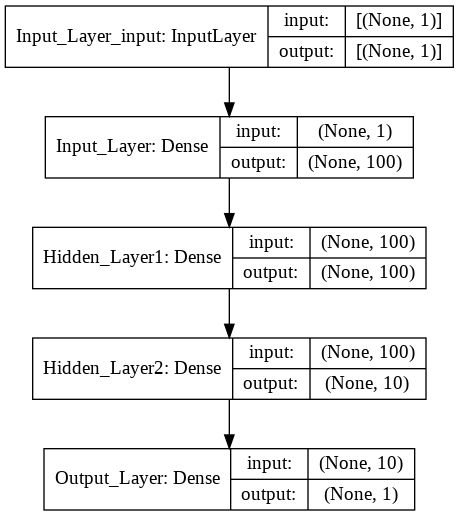

In [37]:
# Visualie the layer of the model
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True, show_layer_names=True)

In [38]:
# Prediction of the model
y_pred = model.predict(X_test)

In [39]:
# Evaluate mean absolute model
mae = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

# Evaluate mean squared error
mse = tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))
mae.numpy(), mse.numpy()

(14.371158, 206.611)

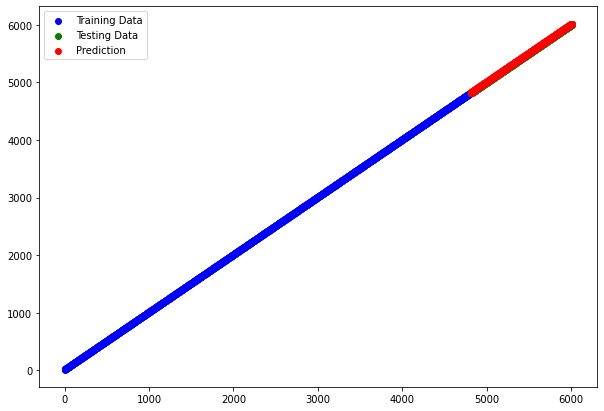

In [40]:
# Visualize the prediction

plt.figure(figsize=(10,7))

# Plot the Train data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")

# Plot the Test data in green
plt.scatter(X_test, y_test, c="g", label="Testing Data")

# Plot the prediction in red
plt.scatter(y_test, y_pred, c="r", label="Prediction")

plt.legend()

Text(0, 0.5, 'Loss')

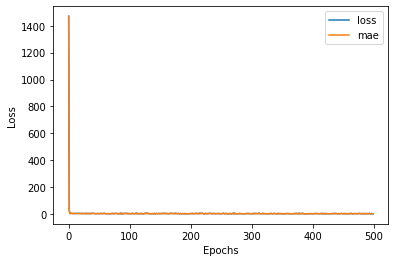

In [41]:
# visualize the training history or the loss curve of the data

pd.DataFrame(history.history).plot()

plt.xlabel("Epochs")
plt.ylabel("Loss")